## 生成数组的函数
### arange
`arange` 类似于Python中的 `range` 函数，只不过返回的不是列表，而是数组：

`arange(start, stop=None, step=1, dtype=None)`

产生一个在区间 `[start, stop)` 之间，以 `step` 为间隔的数组，如果只输入一个参数，则默认从 `0` 开始，并以这个值为结束：

In [1]:
import numpy as np
np.arange(4)

array([0, 1, 2, 3])

与 `range` 不同， `arange` 允许非整数值输入，产生一个非整型的数组：

In [2]:
np.arange(0, 2 * np.pi, np.pi / 4)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

数组的类型默认由参数 `start, stop, step` 来确定，也可以指定：

In [3]:
np.arange(0, 2 * np.pi, np.pi / 4, dtype=np.float32)

array([0.       , 0.7853982, 1.5707964, 2.3561945, 3.1415927, 3.926991 ,
       4.712389 , 5.4977875], dtype=float32)

由于存在精度问题，使用浮点数可能出现问题：

In [4]:
np.arange(1.5, 2.1, 0.3)

array([1.5, 1.8, 2.1])

`stop` 的值 `2.1` 出现在了数组中，所以使用浮点数的时候需要注意。

### linspace

`linspace(start, stop, N)`

产生 `N` 个等距分布在 `[start, stop]`间的元素组成的数组，包括 `start, stop`。

In [5]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### logspace

`logspace(start, stop, N)`

产生 N 个对数等距分布的数组，默认以10为底：

In [6]:
np.logspace(0, 1, 5)

array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ])

产生的值为[10<sup>0</sup>, 10<sup>0.25</sup>, 10<sup>0.5</sup>, 10<sup>0.75</sup>, 10<sup>1</sup>]。

### meshgrid
有时候需要在二维平面中生成一个网格，这时候可以使用 `meshgrid` 来完成这样的工作：

In [7]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

print(x_ticks)
print(y_ticks)

x, y = np.meshgrid(x_ticks, y_ticks)

[-1.  -0.5  0.   0.5  1. ]
[-1.  -0.5  0.   0.5  1. ]


这里产生的 `x, y`如下：

In [8]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [9]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

`x` 对应网格的第一维，`y` 对应网格的第二维。

图例：

C:\Users\86183\AppData\Local\Temp\ipykernel_28684\3303928068.py:9: RuntimeWarning: invalid value encountered in divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

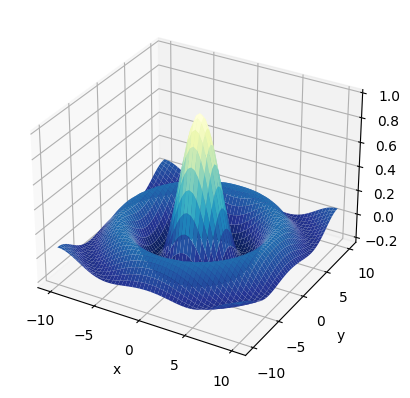

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

事实上，`x, y` 中有很多冗余的元素，这里提供了一个 `sparse` 的选项：

In [11]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

In [12]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [13]:
y

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

在这个选项下，`x, y` 变成了单一的行向量和列向量。

但这并不影响结果：

C:\Users\86183\AppData\Local\Temp\ipykernel_28684\3303928068.py:9: RuntimeWarning: invalid value encountered in divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

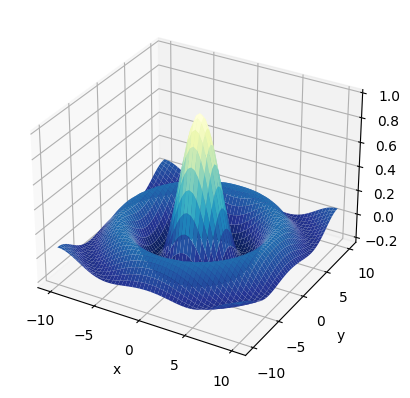

In [14]:
x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

`meshgrid` 可以设置轴排列的先后顺序：

- 默认为 `indexing='xy'` 即笛卡尔坐标，对于2维数组，返回行向量 x 和列向量 y
- 或者使用 `indexing='ij'` 即矩阵坐标，对于2维数组，返回列向量 x 和行向量 y。

### ogrid , mgrid
Matlab中有 `meshgrid` 的用法：

```matlab
meshgrid(-1:.5:1, -1:.5:1)
```

Numpy的 `meshgrid` 并不支持这样的用法，但我们可以使用 `ogrid / mgrid` 来实现类似这样的用法。

`ogrid` 与 `mgrid` 的区别在于：

- ogrid 相当于 meshgrid(indexing='ij', sparse=True)
- mgrid 相当于 meshgrid(indexing='ij', sparse=False)

In [15]:
x, y = np.ogrid[-1:1:.5, -1:1:.5]

In [16]:
x

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5]])

In [17]:
y

array([[-1. , -0.5,  0. ,  0.5]])

注意：

- 这里使用的是中括号
- Matlab 使用的是 `start:step:end` 的表示，Numpy 使用的是 `start:end:step` 的表示
- 这里的结果不包括 `end` 的值

为了包含 `end` 的值，我们可以使用这样的技巧：

In [18]:
x, y = np.ogrid[-1:1:5j, -1:1:5j]

In [19]:
x, y

(array([[-1. ],
        [-0.5],
        [ 0. ],
        [ 0.5],
        [ 1. ]]),
 array([[-1. , -0.5,  0. ,  0.5,  1. ]]))

我们在 `step` 的位置传入一个复数 `5j` ，表示我们需要一个 `5` 个值的数组，此时返回值就会包含 `end` 的值。

重复之前的画图：

C:\Users\86183\AppData\Local\Temp\ipykernel_28684\3303928068.py:9: RuntimeWarning: invalid value encountered in divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

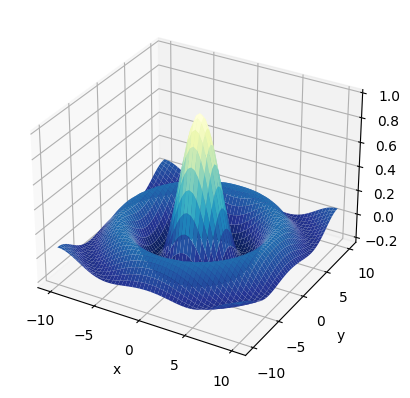

In [20]:
# exchange here
y, x = np.ogrid[-10:10:51j, -10:10:51j]

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

这里，我们交换了 `x, y` 输出值的顺序。
<br><br>

### r_, c_

我们可以使用 `r_ / c_` 来产生行向量或者列向量。

使用切片产生：

In [21]:
np.r_[0:1:.1]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

复数步长制定数组长度：

In [22]:
np.r_[0:1:5j]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

连接多个序列，产生数组：

In [23]:
np.r_[(3,22,11), 4.0, [15, 6]]

array([ 3., 22., 11.,  4., 15.,  6.])

列向量：

In [24]:
np.c_[1:3:5j]

array([[1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ]])

### ones , zeros

```
ones(shape, dtype=float64)
zeros(shape, dtype=float64)
```

产生一个制定形状的全 `0` 或全 `1` 的数组，还可以制定数组类型：

In [25]:
np.zeros(3)

array([0., 0., 0.])

In [26]:
np.ones([2,3], dtype=np.float32)

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

产生一个全是 `5` 的数组：

In [27]:
np.ones([2,3]) * 5

array([[5., 5., 5.],
       [5., 5., 5.]])

### empty

```
empty(shape, dtype=float64, order='C')
```

也可以使用 `empty` 方法产生一个制定大小的数组（数组所指向的内存未被初始化，所以值随机），再用 `fill` 方法填充：

In [28]:
a = np.empty(2)
a

array([inf, inf])

In [29]:
a.fill(5)
a

array([5., 5.])

另一种替代方法使用索引，不过速度会稍微慢一些：

In [30]:
a[:] = 5
a

array([5., 5.])

### empty_like, ones_like, zeros_like

```
empty_like(a)
ones_like(a)
zeros_like(a)
```

产生一个跟 `a` 大小一样，类型一样的对应数组。

In [31]:
a = np.arange(0, 10, 2.5)
a

array([0. , 2.5, 5. , 7.5])

In [32]:
np.empty_like(a)

array([0. , 2.5, 5. , 7.5])

In [33]:
np.zeros_like(a)

array([0., 0., 0., 0.])

In [34]:
np.ones_like(a)

array([1., 1., 1., 1.])

### identity

```
indentity(n, dtype=float64)
```

产生一个 n 乘 n 的单位矩阵：

In [35]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])